In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Importation des données

In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

On utilise ici la base de donnée du diabète fournie par Scikitlearn. $y$ est le taux du diabète chez les $420$ individues et $X$ est constitué de $10$ colonnes qui représentent l'âge, le sexe ....

## Problème de regression ##

L'idée est de relier de manière linéaire ce $y$ à $X$.

Ici on suppose que $X\in \mathcal{M}_{n, m}(\mathbb{R})$. Du coup on cherche $a_0, \dots, a_m\ \in \mathbb{R}^m$ telle que $$ \left\|\sum_{i=0}^m a_i X_i - y \right\|^2 $$ soit minimale avec $X_i$ sont les colonnes de $X$ et $X_0$ est une colonne constituée de $1$.

### Première étape ###
On ajoute à $X$ une colonne constituée de $1$ et on continuera à appeler la nouvelle matrice $X$.

On suppose que $\ker(X) = \{ 0 \}$. Ceci signifie que les colonnes (variables explicatives) sont linéairement indépendantes. On montre rapidement le résultat suivant:

#### Lemme #### 
Soit $X\in \mathcal{M}_{n, m+1}(\mathbb{R})$. On a  $\ker(X) = \{ 0 \}$ si et seulement si ${}^t X X$ est inversible.

On récupère ainsi une matrice ${}^t X X\in \mathcal{M}_{m+1, m+1}(\mathbb{R})$ qui est symétrique définie positive.

### Deuxième étape ###

Si on pose $\beta$ le vecteur de composantes $a_0, \dots, a_m $. Notre problème revient à trouver $\beta^*$ telle que $$ J(\beta) = \left\|X \beta - y \right\|^2 $$ 

En remarquant que $J$ est strictement convexe et coercice, $\beta^*$ sera donc un point critique de $\nabla J$. C'est à dire, $\beta$ est la solution du système linéaire $$ {}^t X X \beta = {}^t X y $$.

On dispose d'une multitude de manière de résoudre ce système

## Résolution par méthode du gradient ##

In [3]:
n, m = shape(X)

In [4]:
e = ones((n, 1))
X = concatenate((e, X), axis = 1)

In [5]:
A = matmul(X.T, X)
b = matmul(X.T, y)

In [6]:
tol = 10 ** (-10)

In [7]:
def gradopti(A, b, tol):
    n = shape(A)[0]
    x = rand(n)
    res = matmul(A, x) - b
    nres = norm(res)
    niter = 0
    while (nres > tol):
        r = nres ** 2 / vdot(matmul(A, res), res)
        x = x - r * res
        res = matmul(A, x) - b
        nres = norm(res)
        niter += 1
    return x, niter

In [8]:
seed(0)
tol = [10 ** (-i) for i in range(12)]

In [9]:
Niter = []
for t in tol:
    beta, ni = gradopti(A, b, t)
    Niter.append(ni)

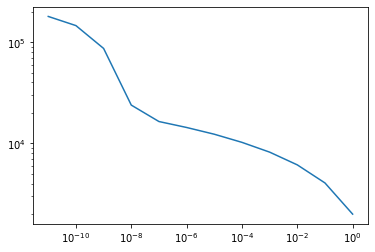

In [10]:
loglog(tol, Niter)

In [11]:
polyfit(log(tol), log(Niter), 1)

array([-0.16260653,  7.69297549])

On calcule l'erreur relative:

In [12]:
norm(y - matmul(X, beta)) / norm(y)

0.3136198309624024

On cherche le nombre de conditionnement de $A$ auquel dépendra le nombre d'itérations nécessaires

In [13]:
K = eig(A)[0][0] / eig(A)[0][-1]
K

733.3431422140842

Le nombre de conditionnement est trop grand et le taux de convergence est proche de $1$. Algorithme lent!

In [14]:
(K - 1) / (K + 1)

0.9972764775960596

## Préconditionnementt ##

In [15]:
D = diag( 1 / sqrt(diag(A)))

In [16]:
Ap = matmul(D, matmul(A, D))
bp = matmul(D, b)

On recalcule le ombre de conditionnement

In [17]:
Kp = eig(Ap)[0][0] / eig(Ap)[0][-1]
Kp

6.676764408450402

valeur acceptable

In [18]:
(Kp - 1) / (Kp + 1)

0.7394735732936591

In [19]:
seed(0)
tol = [10 ** (-i) for i in range(12)]

In [20]:
Niterp = []
for t in tol:
    beta, ni = gradopti(Ap, bp, t)
    Niterp.append(ni)

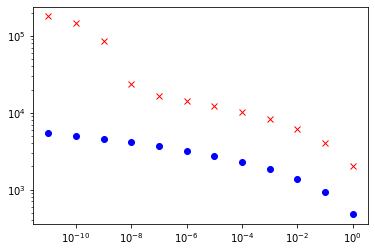

In [21]:
loglog(tol, Niter ,'rx', tol, Niterp, 'ob')